<function matplotlib.pyplot.show(close=None, block=None)>

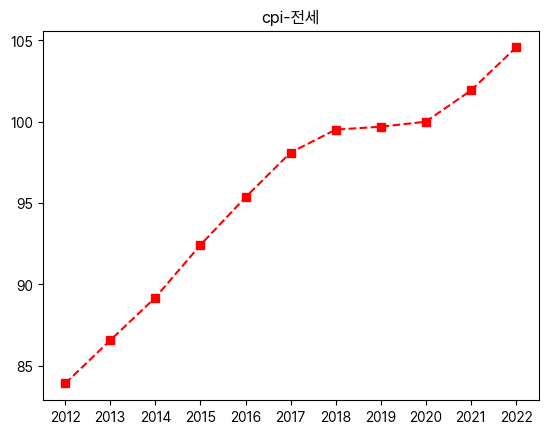

In [75]:
import pandas as pd, numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt
plt.rc('font', family='Pretendard')
mpl.rc('axes', unicode_minus=False)
%matplotlib inline

cpi = pd.read_csv('cpi_0222.csv', index_col='계정항목')
cpi.drop(['통계표', '단위', '가중치', '변환'], axis=1, inplace=True)

# cpi['10년 증가'] = np.round((cpi['2022'] - cpi['2012']) / cpi['2012'] * 100, 2)
# upndown = [-100, 0, 10, 100]
# labels = ['감소', '소폭 증가', '증가']
# cpi['증감폭'] = pd.cut(cpi['10년 증가'], upndown, labels=labels)

plt.title('cpi-전세')
plt.plot(cpi.iloc[0], 'rs--')
plt.show



In [53]:
import numpy as np, pandas as pd
np.random.seed(1)
df1 = pd.DataFrame(np.random.randint(10, size=(4, 8)))
df1 = df1.apply(lambda x: np.round(x/x.sum()*100, 0), axis=1)
df1.loc[:, 'total'] = df1.sum(axis=1)
df1

df1['check'] = df1.apply(lambda x: 'over' if x[0]>15 else 'none', axis=1)
df1


,0,1,2,3,4,5,6,7,total,check
0,14.0,23.0,26.0,14.0,0.0,0.0,3.0,20.0,100.0,none
1,18.0,26.0,6.0,12.0,15.0,6.0,12.0,6.0,101.0,over
2,10.0,17.0,17.0,22.0,2.0,17.0,0.0,15.0,100.0,none
3,21.0,21.0,17.0,14.0,21.0,2.0,0.0,2.0,98.0,over


In [26]:
import numpy as np, pandas as pd

df1 = pd.DataFrame(
    np.arange(6).reshape(3, 2),
    index=['a', 'b', 'c'],
    columns=['데이터1', '데이터2'])
df2 = pd.DataFrame(
    5 + np.arange(4).reshape(2, 2),
    index=['a', 'c'],
    columns=['데이터3', '데이터4'])
pd.concat([df1, df2], axis=1)

,데이터1,데이터2,데이터3,데이터4
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


In [34]:
import numpy as np, pandas as pd

data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1.pivot_table('인구', '도시', '연도', margins=True, margins_name='합계')

연도,2005,2010,2015,합계
도시,,,,
부산,3512547.0,3393191.0,3448737.0,3.451492e+06
서울,9762546.0,9631482.0,9904312.0,9.766113e+06
인천,NaN,263203.0,2890451.0,1.576827e+06
합계,6637546.5,4429292.0,5414500.0,5.350809e+06


In [97]:
import numpy as np, pandas as pd, seaborn as sns

def q3cut(s):
    return pd.qcut(s, 3, labels=[1, 2, 3]).astype(str)
def alive_ratio(s):
    return s.sum()/len(titanic)

titanic = sns.load_dataset("titanic")
titanic['age_cat'] = titanic.age.transform(q3cut)
# titanic.groupby(['sex', 'age_cat', 'class'])[['survived']].agg(alive_ratio).unstack('class')
titanic.groupby(['sex', 'class'])[['survived']].agg(alive_ratio)

survived
sex    class           
female First   0.102132
       Second  0.078563
       Third   0.080808
male   First   0.050505
       Second  0.019080
       Third   0.052750